

# 项目：调查未前往就诊的挂号预约数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **介绍与说明**：本数据集包含10万条巴西预约挂号的求诊信息，研究病人是否如约前往医院就诊。每行数据录入了有关患者特点的多个数值，包括 “预约日期 (ScheduledDay)”指患者具体预约就诊的日期；“街区 (Neighborhood) ”指医院所在位置；“福利保障 (Scholarship)”说明病人是否是巴西福利项目 Bolsa Família 的保障人群；请注意最后一列内容的编码：“No”表示病人已如约就诊，“Yes”说明病人未前往就诊；handcap 指的是残疾情况, 如果大于1的话,，表示患者有多种残疾。  
>**研究问题**：1、年龄能否帮我们预测患者是否会按照其挂号预约前往医院就诊？  2、福利保障能否帮我们预测患者是否会按照其挂号预约前往医院就诊？ 3、Hipertension 能否帮我们预测患者是否会按照其挂号预约前往医院就诊？  4、Diabetes 能否帮我们预测患者是否会按照其挂号预约前往医院就诊？  5、Alcoholism 能否帮我们预测患者是否会按照其挂号预约前往医院就诊？  6、Handcap 能否帮我们预测患者是否会按照其挂号预约前往医院就诊？  7、性别能否帮我们预测患者是否会按照其挂号预约前往医院就诊？  8、性别和福利保障一起对患者是否会按照其挂号预约前往医院就诊的影响？

In [1]:
# 用这个框对你计划使用的所有数据包设置
#   导入语句。
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
# 务必包含一个‘咒语’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问这个网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## 数据整理



### 常规属性

In [2]:
# 加载数据并打印几行
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# 返回数据框维度的元组
df.shape

(110527, 14)

In [4]:
# 返回列的数据类型
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
type(df['Gender'][0])

str

In [6]:
type(df['ScheduledDay'][0])

str

In [7]:
type(df['AppointmentDay'][0])

str

In [8]:
type(df['Neighbourhood'][0])

str

In [9]:
type(df['No-show'][0])

str

In [10]:
# 显示数据框的简明摘要，
# 包括每列非空值的数量
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
# 计算每列缺失值的数量
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [12]:
# 检查是否有重复行
df.duplicated().sum()

0

In [13]:
# 对数据进行描述性统计
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
# 对 Age进行升序排列
df.sort_values('Age').head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No
34218,3.469431e+12,5649465,F,2016-05-03T06:57:26Z,2016-05-09T00:00:00Z,0,REDENÇÃO,0,0,0,0,0,0,Yes
102834,4.882675e+10,5659726,F,2016-05-04T14:35:59Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,1,No
102832,9.726846e+12,5749887,F,2016-05-31T08:19:38Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,0,No
102830,2.845290e+13,5664173,M,2016-05-05T11:24:09Z,2016-06-08T00:00:00Z,0,SÃO CRISTÓVÃO,0,0,0,0,0,1,No
49411,7.269995e+14,5650471,F,2016-05-03T07:47:14Z,2016-05-03T00:00:00Z,0,SANTOS DUMONT,0,0,0,0,0,0,No
45406,5.757419e+12,5639154,M,2016-04-29T08:46:10Z,2016-05-02T00:00:00Z,0,SANTO ANDRÉ,0,0,0,0,0,0,No
49413,4.454289e+13,5561032,F,2016-04-08T10:00:40Z,2016-05-10T00:00:00Z,0,SANTOS DUMONT,0,0,0,0,0,1,No
102783,8.183869e+11,5769382,M,2016-06-03T08:46:44Z,2016-06-06T00:00:00Z,0,JOANA D´ARC,0,0,0,0,0,1,Yes
102765,9.433852e+13,5776330,F,2016-06-06T10:51:19Z,2016-06-06T00:00:00Z,0,SANTA CECÍLIA,0,0,0,0,0,0,No


In [15]:
# 对 Handcap 列进行降序排列
df.sort_values(['Handcap'],ascending=False).head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
104268,7.581895e+14,5697136,F,2016-05-13T15:01:17Z,2016-06-02T00:00:00Z,9,ITARARÉ,0,0,0,0,4,1,Yes
98538,4.972463e+14,5760621,M,2016-06-01T15:11:25Z,2016-06-03T00:00:00Z,19,SÃO PEDRO,0,0,0,0,4,0,No
91820,9.251878e+12,5789549,M,2016-06-08T15:14:00Z,2016-06-08T00:00:00Z,15,DA PENHA,0,0,0,0,4,0,No
78644,3.616644e+13,5608507,M,2016-04-20T13:56:51Z,2016-05-05T00:00:00Z,7,BONFIM,0,0,0,0,3,1,No
71457,5.229634e+14,5652195,F,2016-05-03T09:48:10Z,2016-05-06T00:00:00Z,64,SANTA LUÍZA,0,0,0,0,3,1,No
69683,5.229634e+14,5684755,F,2016-05-11T09:05:23Z,2016-05-11T00:00:00Z,64,SANTA LUÍZA,0,0,0,0,3,0,No
104931,3.995198e+12,5734979,M,2016-05-24T16:35:44Z,2016-06-01T00:00:00Z,70,ANDORINHAS,0,0,0,1,3,0,No
104932,3.995198e+12,5734980,M,2016-05-24T16:35:44Z,2016-06-01T00:00:00Z,70,ANDORINHAS,0,0,0,1,3,0,No
69781,5.229634e+14,5651451,F,2016-05-03T08:50:52Z,2016-05-03T00:00:00Z,64,SANTA LUÍZA,0,0,0,0,3,0,No
28840,6.656653e+13,5586010,M,2016-04-15T07:12:28Z,2016-05-03T00:00:00Z,15,ROMÃO,0,0,0,0,3,1,Yes



### 清理未前往就诊的挂号预约数据

In [16]:
# 讨论数据结构和需要解决的任何问题之后，
#   在本段的第二部分进行这些清理步骤。
#  从数据集中丢弃列
df.drop(['PatientId','AppointmentID','ScheduledDay','Neighbourhood','AppointmentDay','SMS_received'],axis=1,inplace=True)
#  确认更改
df.head(1)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,F,62,0,1,0,0,0,No


>PatientId、AppointmentID、ScheduledDay、Neighbourhood、AppointmentDay 和 SMS_received 对后续的数据探索没有影响，因此丢弃，使数据集更加简洁。

In [17]:
df['no_show_bin'] = df['No-show'].replace({'Yes': 1, 'No': 0})
df.head(1)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show,no_show_bin
0,F,62,0,1,0,0,0,No,0


>用数值编码来代替 No 和 Yes, 后面数据探索可以用 mean 来得到未赴约的占比。

In [18]:
# 改列名
df=df.rename(columns={'No-show':'No_show'})
# 确认更改
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No_show,no_show_bin
0,F,62,0,1,0,0,0,No,0
1,M,56,0,0,0,0,0,No,0
2,F,62,0,0,0,0,0,No,0
3,F,8,0,0,0,0,0,No,0
4,F,56,0,1,1,0,0,No,0


In [19]:
# Handcap 的唯一值
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

>handcap 指的是残疾情况, 如果大于1的话， 表示患者有多种残疾，所以 handcap 最大值为 4 不算异常值。

In [20]:
# 计算 Age 异常值的数量
df[df['Age'] < 1]['Age'].count()

3540

In [21]:
print('Age 异常值占总数据量的百分比 ：{:.0%}'.format(3540/df['Age'].count()))

Age 异常值占总数据量的百分比 ：3%


> Age 异常值占总数据量的 3 %，数量较大，不适合删除。 

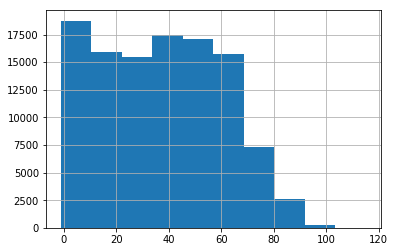

In [22]:
# 画 Age 的直方图，看 Age 的分布
df['Age'].hist();

>填充数值时，一般会用统计数据, 比如均值, 中位数或众数填充。对于连续型变量，如果变量的分布近似或就是正态分布的话，可以用均值替代那些异常值；如果变量是有偏的，可以使用中位数来代替那些异常值；对于离散型变量，我们一般用众数去替换那些异常值。年龄属于连续变量，根据直方图，我们采用中位数来代替异常值。

In [23]:
# 计算年龄的中位数
df['Age'].median()

37.0

In [24]:
# Age 异常值替换
df['Age'].replace([-1,0],df['Age'].median(),inplace=True)
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No_show,no_show_bin
0,F,62,0,1,0,0,0,No,0
1,M,56,0,0,0,0,0,No,0
2,F,62,0,0,0,0,0,No,0
3,F,8,0,0,0,0,0,No,0
4,F,56,0,1,1,0,0,No,0


>年龄范围应该在大于等于 1 ，小于 1 由中位数代替，对于年龄大于 100 的有可能存在，所以不属于异常值。

In [25]:
# 确认更改
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,no_show_bin
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.273933,0.098266,0.197246,0.071865,0.030400,0.022248,0.201933
std,22.104720,0.297675,0.397921,0.258265,0.171686,0.161543,0.401444
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [26]:
# 查看清理完的数据集
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No_show,no_show_bin
0,F,62,0,1,0,0,0,No,0
1,M,56,0,0,0,0,0,No,0
2,F,62,0,0,0,0,0,No,0
3,F,8,0,0,0,0,0,No,0
4,F,56,0,1,1,0,0,No,0


In [27]:
# 保存新数据集
df.to_csv('data_cleaning_noshowappointments.csv',index=False)

<a id='eda'></a>
## 探索性数据分析



### 研究问题 1（年龄能否帮我们预测患者是否会按照其挂号预约前往医院就诊？）

In [28]:
# 用这个代码框和其它代码框探索数据。务必添加
#   Markdown 框，以便归档你的观察和调查结果。
#  加载清理完的数据集
df_cleaning = pd.read_csv('data_cleaning_noshowappointments.csv')
df_cleaning.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No_show,no_show_bin
0,F,62,0,1,0,0,0,No,0
1,M,56,0,0,0,0,0,No,0
2,F,62,0,0,0,0,0,No,0
3,F,8,0,0,0,0,0,No,0
4,F,56,0,1,1,0,0,No,0


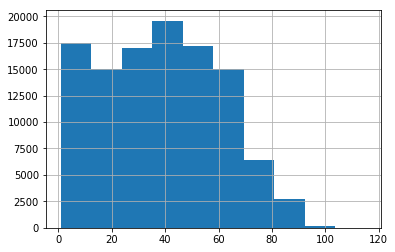

In [29]:
# 画出 Age 的直方图
df_cleaning['Age'].hist();

In [30]:
# 计算如约就诊的人数
No_show = df_cleaning[df_cleaning['No_show'] == 'No']['No_show'].count()
# 计算未前往就诊的人数
show = df_cleaning[df_cleaning['No_show'] == 'Yes']['No_show'].count()

No_show
No     39.006938
Yes    35.376988
Name: Age, dtype: float64


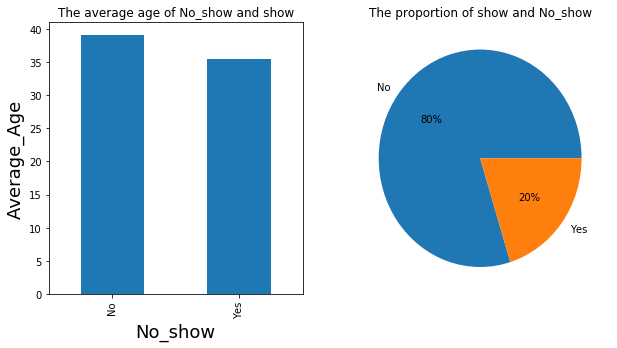

In [31]:
# 用 groupby 计算如约就诊与未前往就诊的平均年龄
Age_means = df_cleaning.groupby('No_show')['Age'].mean()
plt.figure(figsize = (10,5))
plt.subplot(121)
Age_means.plot(kind='bar',title='The average age of No_show and show')
plt.xlabel('No_show',fontsize=18)
plt.ylabel('Average_Age',fontsize=18)
print(Age_means)

# 如约就诊与未前往就诊所占比例
plt.subplot(122)
plt.pie([No_show, show],labels=['No','Yes'],autopct='%1.0f%%')
plt.title('The proportion of show and No_show');

> 由饼图可以看出如约就诊的人数占 80%，远大于未前往就诊的人数,且如约就诊的人的平均年龄在39岁左右，而未前往就诊的人的年龄在35岁左右。

### 研究问题 2（福利保障能否帮我们预测患者是否会按照其挂号预约前往医院就诊？）

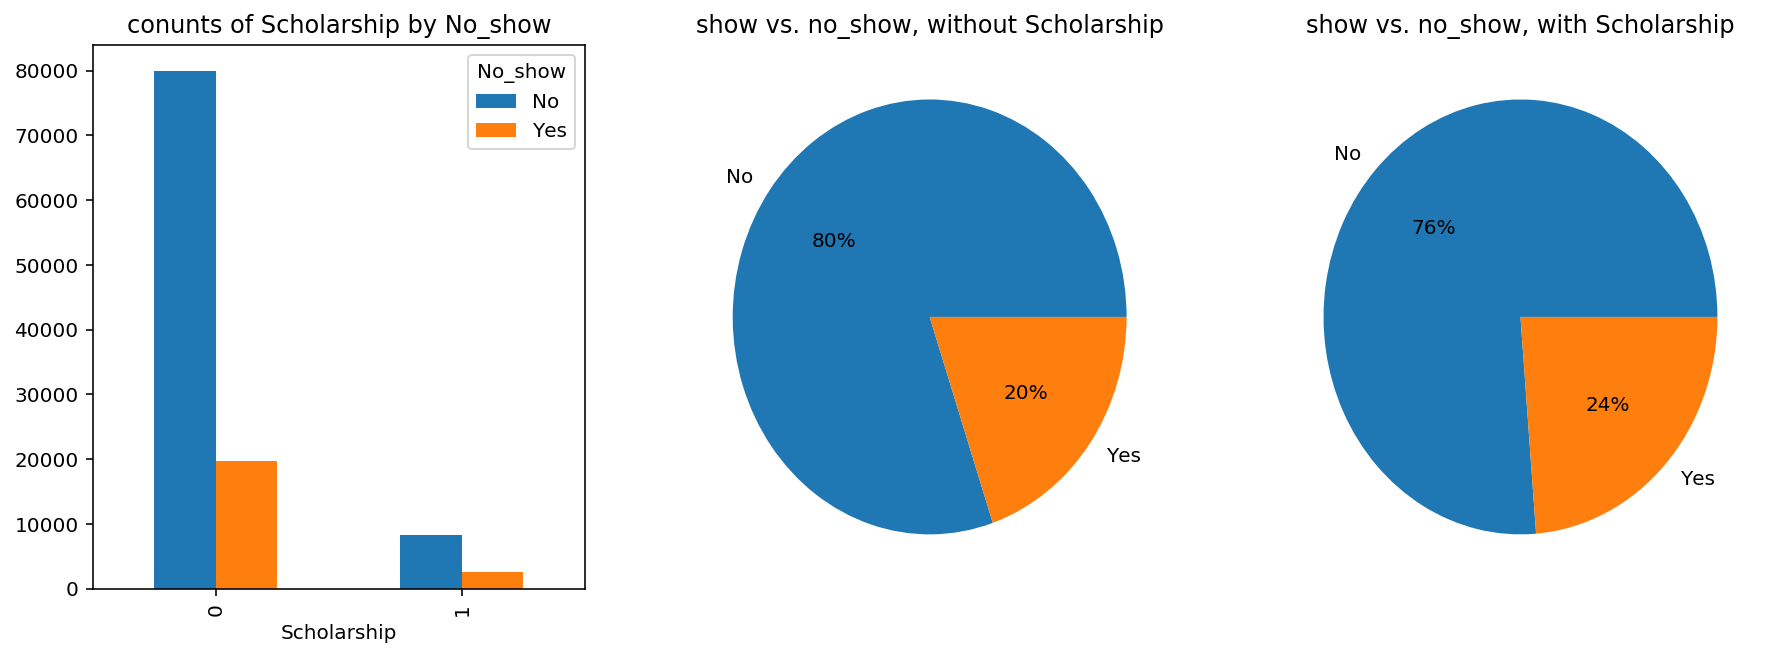

In [32]:
%config InlineBackend.figure_format = 'retina'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) # 下面的unstack不支持subplot
counts_Scholarship=df_cleaning.groupby(['Scholarship','No_show']).count()['Age']
counts_Scholarship.unstack().plot(kind='bar',title='conunts of Scholarship by No_show', ax=axes[0])

axes[1].pie(counts_Scholarship[0], labels=['No', 'Yes'], autopct='%1.0f%%')
axes[1].set_title('show vs. no_show, without Scholarship')

axes[2].pie(counts_Scholarship[1], labels=['No', 'Yes'], autopct='%1.0f%%')
axes[2].set_title('show vs. no_show, with Scholarship');

> 福利保障能帮我们预测患者是否会按照其挂号预约前往医院就诊。其中，无福利保障与有福利保障未赴约人数的比例均大于赴约。

### 研究问题 3（Hipertension 能否帮我们预测患者是否会按照其挂号预约前往医院就诊？）

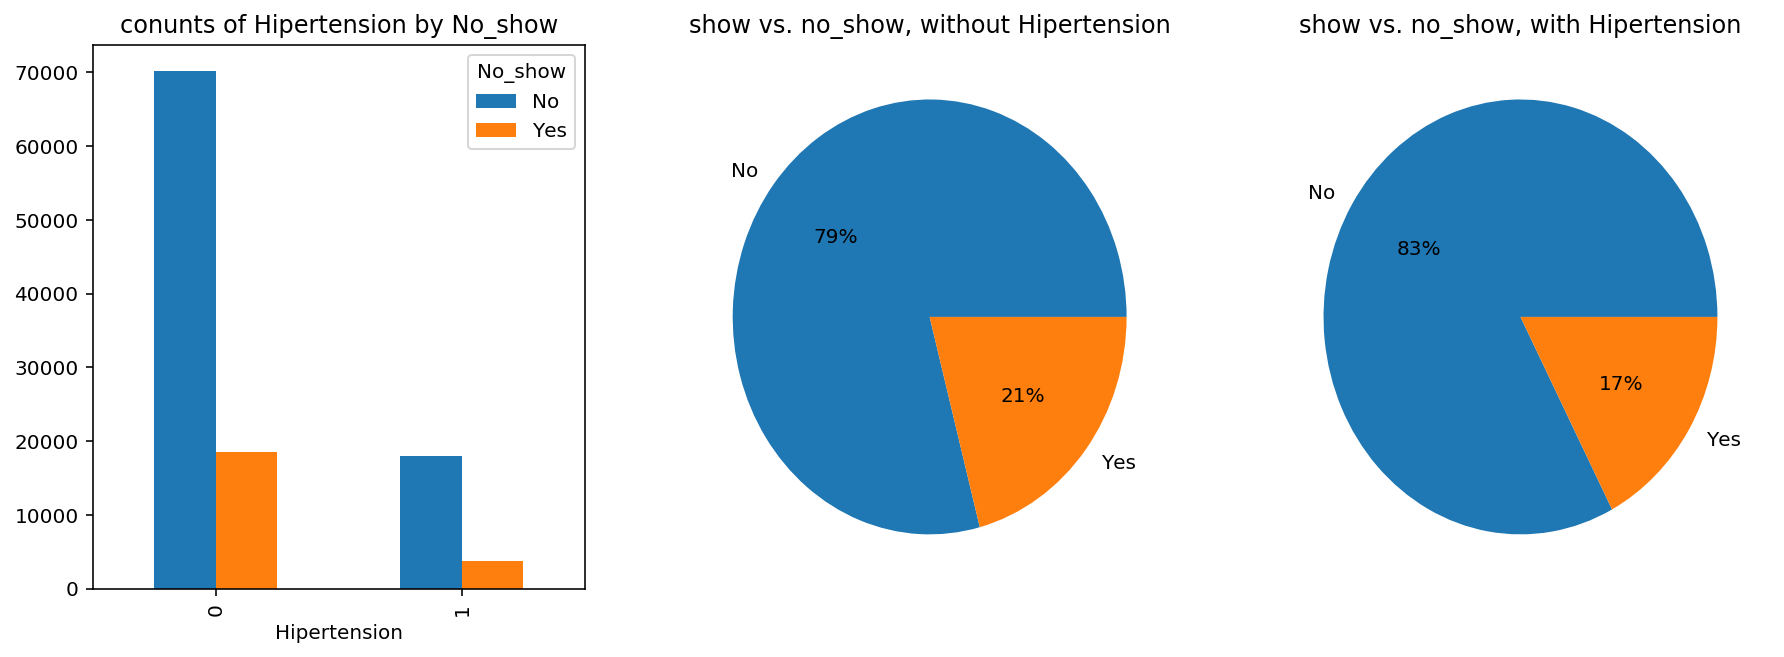

In [33]:
%config InlineBackend.figure_format = 'retina'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) # 下面的unstack不支持subplot
counts_Hipertension=df_cleaning.groupby(['Hipertension','No_show']).count()['Age']
counts_Hipertension.unstack().plot(kind='bar',title='conunts of Hipertension by No_show', ax=axes[0])

axes[1].pie(counts_Hipertension[0], labels=['No', 'Yes'], autopct='%1.0f%%')
axes[1].set_title('show vs. no_show, without Hipertension')

axes[2].pie(counts_Hipertension[1], labels=['No', 'Yes'], autopct='%1.0f%%')
axes[2].set_title('show vs. no_show, with Hipertension');

> 患 Hipertension 能帮我们预测患者是否会按照其挂号预约前往医院就诊。其中，患 Hipertension与未患 Hipertension的未赴约人数的比例均大于赴约。

### 研究问题 4（Diabetes 能否帮我们预测患者是否会按照其挂号预约前往医院就诊？）

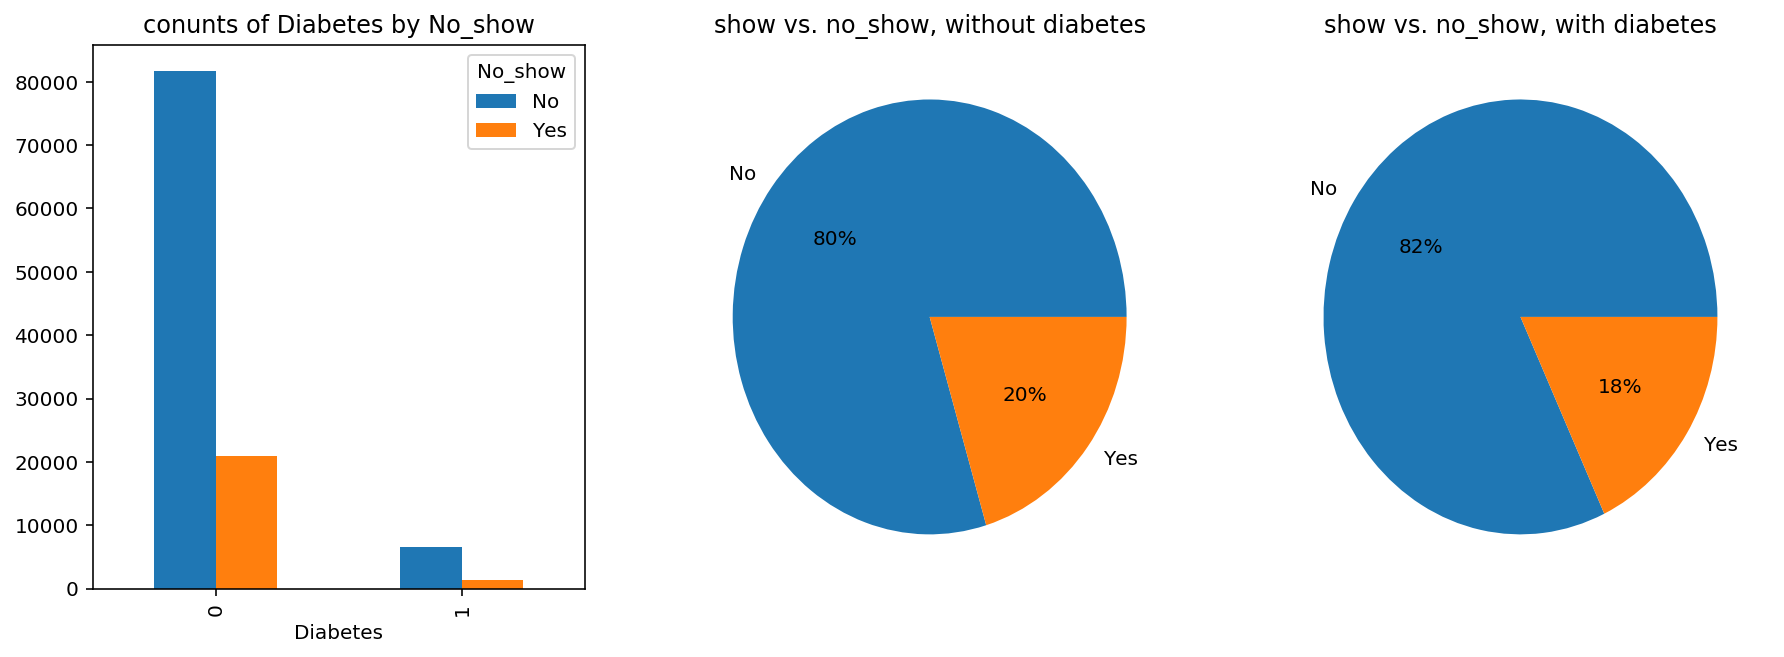

In [34]:
%config InlineBackend.figure_format = 'retina'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) # 下面的unstack不支持subplot
counts_Diabetes=df_cleaning.groupby(['Diabetes','No_show']).count()['Age']
counts_Diabetes.unstack().plot(kind='bar',title='conunts of Diabetes by No_show', ax=axes[0])

axes[1].pie(counts_Diabetes[0], labels=['No', 'Yes'], autopct='%1.0f%%')
axes[1].set_title('show vs. no_show, without diabetes')

axes[2].pie(counts_Diabetes[1], labels=['No', 'Yes'], autopct='%1.0f%%')
axes[2].set_title('show vs. no_show, with diabetes');

>患 Diabetes 能帮我们预测患者是否会按照其挂号预约前往医院就诊。其中，患 Diabetes与未患 Diabetes的未赴约人数的比例均大于赴约。

### 研究问题 5（Alcoholism 能否帮我们预测患者是否会按照其挂号预约前往医院就诊？）

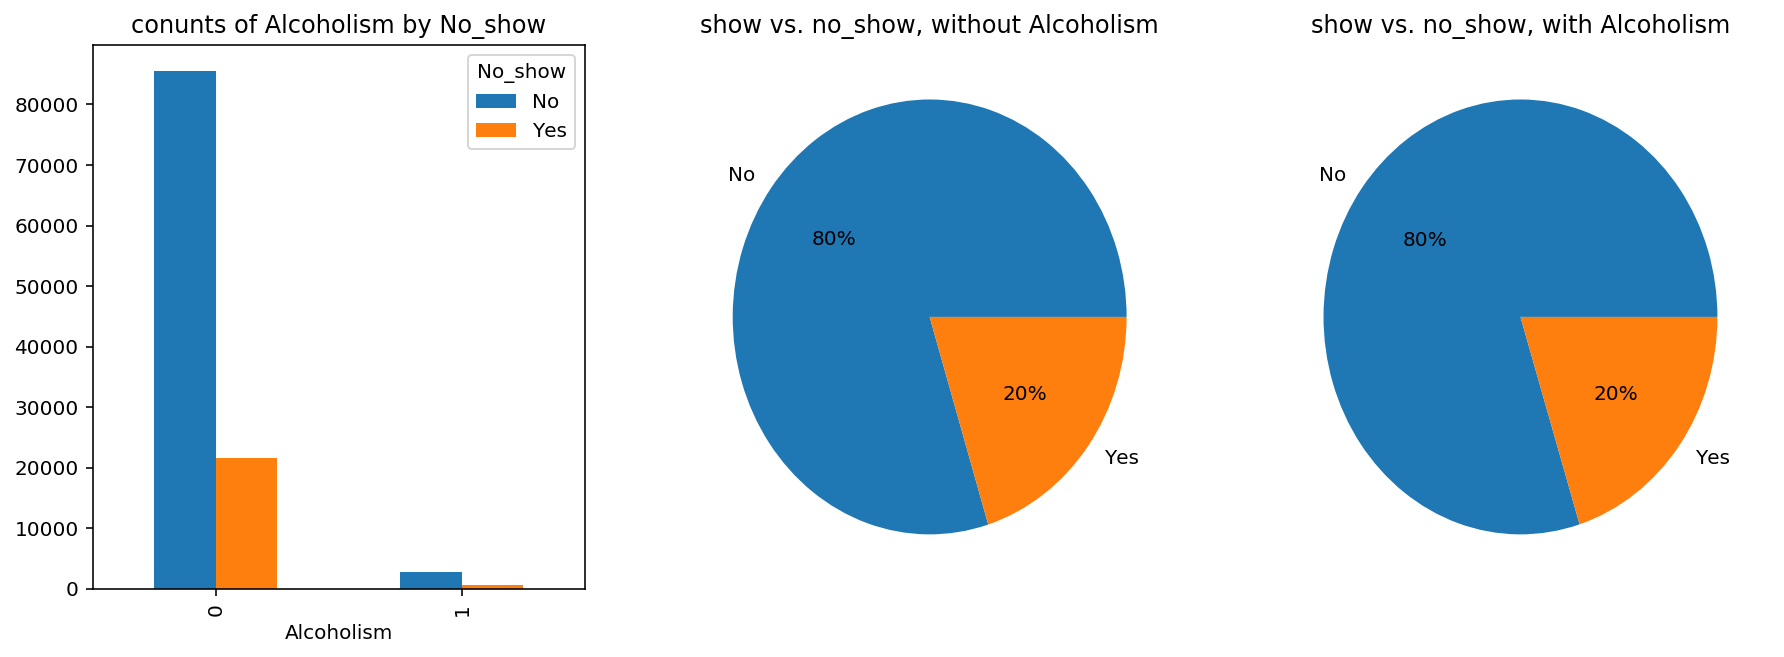

In [35]:
%config InlineBackend.figure_format = 'retina'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) # 下面的unstack不支持subplot
counts_Alcoholism=df_cleaning.groupby(['Alcoholism','No_show']).count()['Age']
counts_Alcoholism.unstack().plot(kind='bar',title='conunts of Alcoholism by No_show', ax=axes[0])

axes[1].pie(counts_Alcoholism[0], labels=['No', 'Yes'], autopct='%1.0f%%')
axes[1].set_title('show vs. no_show, without Alcoholism')

axes[2].pie(counts_Alcoholism[1], labels=['No', 'Yes'], autopct='%1.0f%%')
axes[2].set_title('show vs. no_show, with Alcoholism');

>患 Alcoholism  能帮我们预测患者是否会按照其挂号预约前往医院就诊。其中，患 Alcoholism与未患 Alcoholism 的未赴约人数的比例均大于赴约。

### 研究问题 6（Handcap 能否帮我们预测患者是否会按照其挂号预约前往医院就诊？）

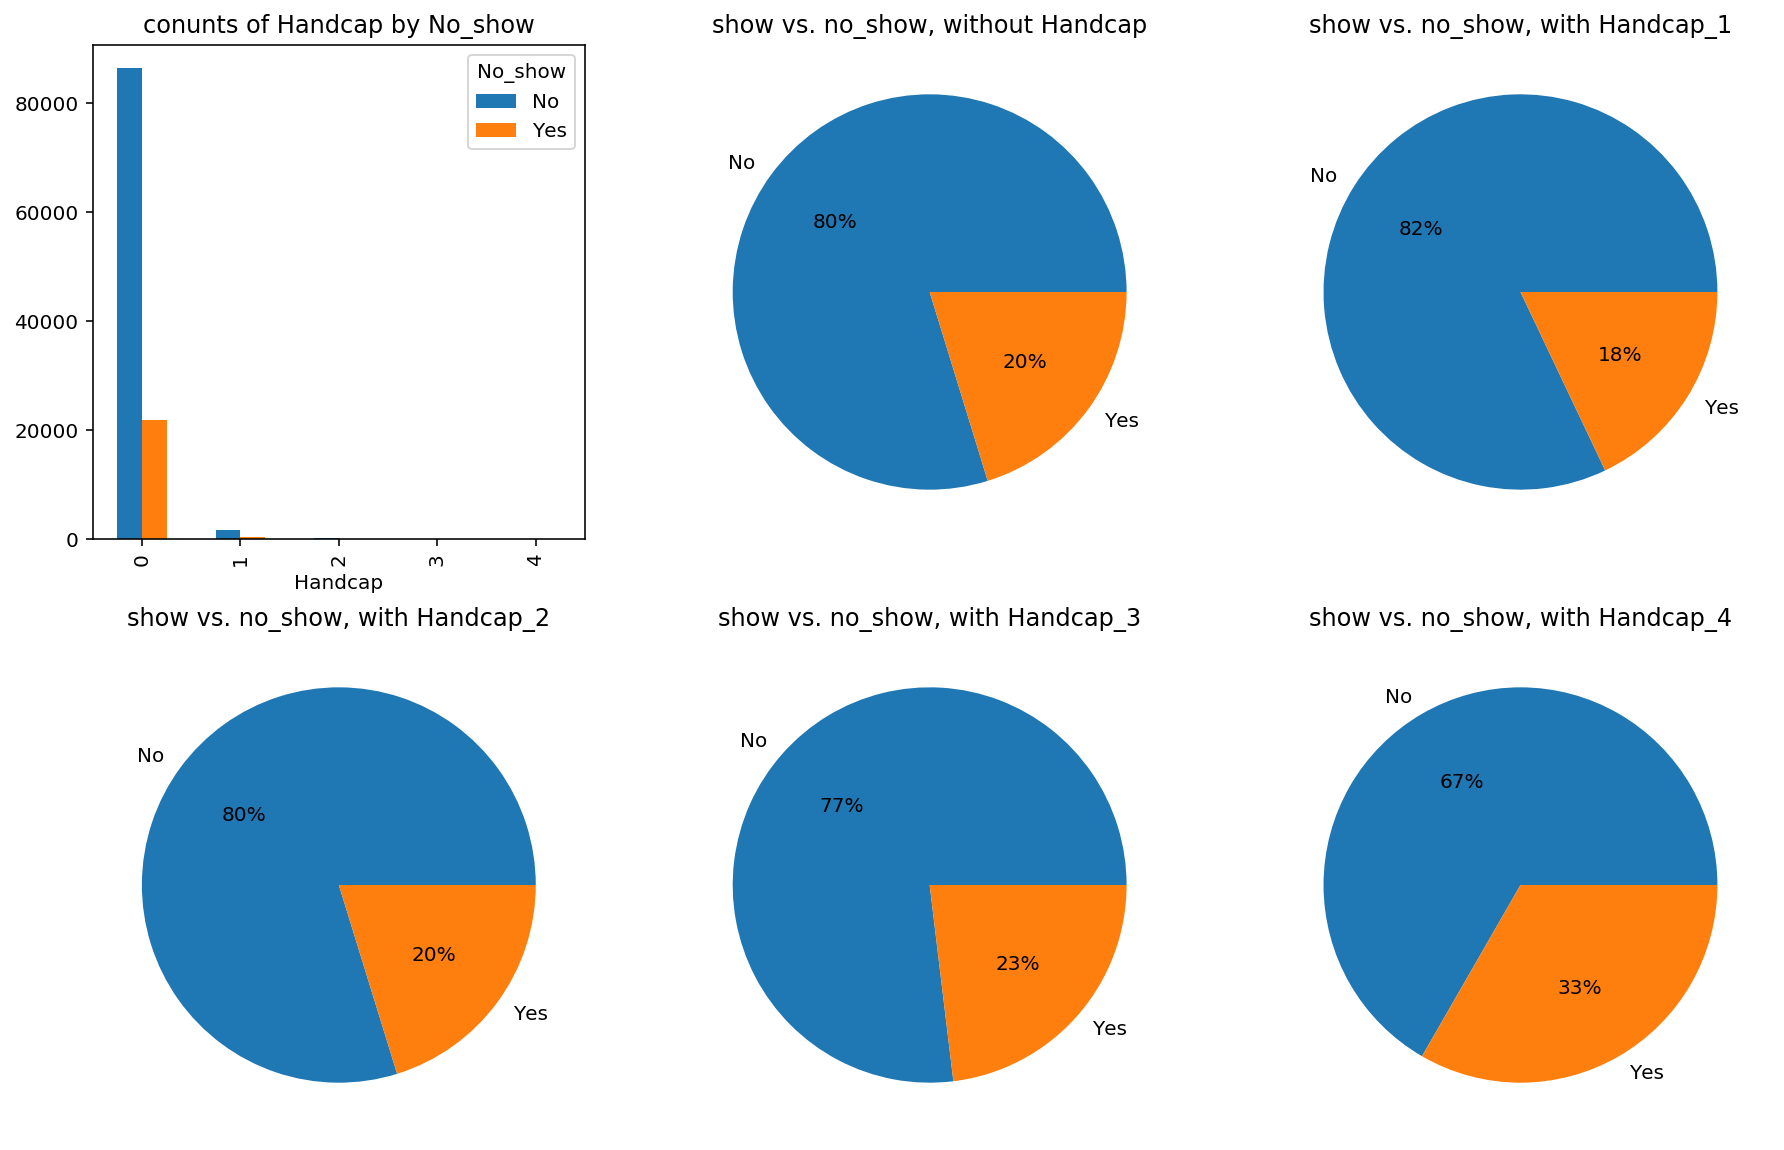

In [36]:
# Handcap 对如约就诊与未前往就诊的影响

%config InlineBackend.figure_format = 'retina'
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10)) # 下面的unstack不支持subplot
counts_Handcap=df_cleaning.groupby(['Handcap','No_show']).count()['Age']
counts_Handcap.unstack().plot(kind='bar',title='conunts of Handcap by No_show', ax=axes[0,0])

axes[0,1].pie(counts_Handcap[0], labels=['No', 'Yes'], autopct='%1.0f%%')
axes[0,1].set_title('show vs. no_show, without Handcap')

axes[0,2].pie(counts_Handcap[1], labels=['No', 'Yes'], autopct='%1.0f%%')
axes[0,2].set_title('show vs. no_show, with Handcap_1')

axes[1,0].pie(counts_Handcap[2], labels=['No', 'Yes'], autopct='%1.0f%%')
axes[1,0].set_title('show vs. no_show, with Handcap_2')

axes[1,1].pie(counts_Handcap[3], labels=['No', 'Yes'], autopct='%1.0f%%')
axes[1,1].set_title('show vs. no_show, with Handcap_3')

axes[1,2].pie(counts_Handcap[4], labels=['No', 'Yes'], autopct='%1.0f%%')
axes[1,2].set_title('show vs. no_show, with Handcap_4');

>患 Handcap 能帮我们预测患者是否会按照其挂号预约前往医院就诊。其中，患 Handcap 与未患 Handcap 的未赴约人数的比例均大于赴约。

### 研究问题 7（性别对患者是否会按照其挂号预约前往医院就诊的影响？）

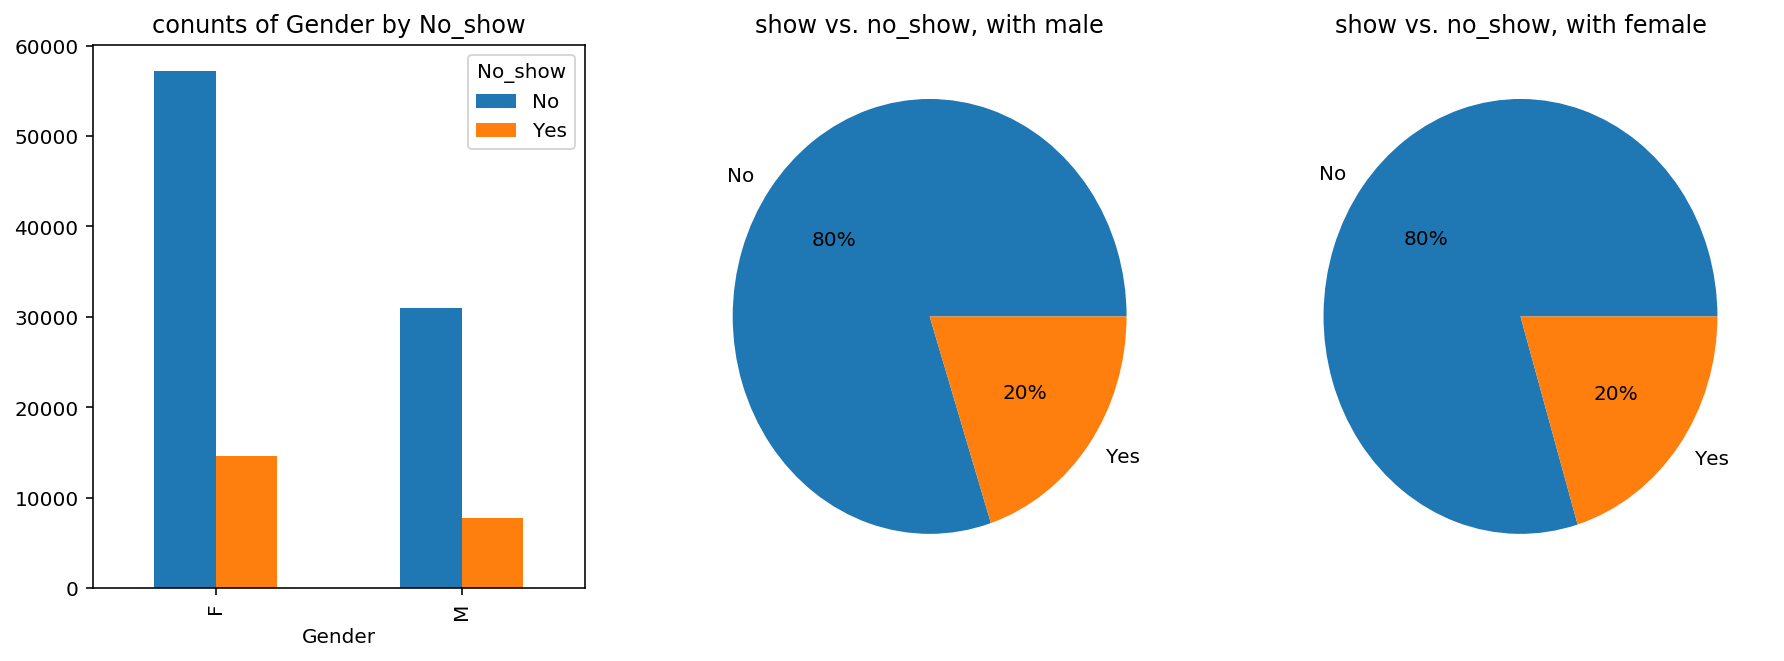

In [37]:
# 继续探索数据，解决你的附加研究问题。
#   如果有其它问题要调查，
#   请根据需要添加更多标题。

%config InlineBackend.figure_format = 'retina'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) # 下面的unstack不支持subplot
counts_Gender=df_cleaning.groupby(['Gender','No_show']).count()['Age']
counts_Gender.unstack().plot(kind='bar',title='conunts of Gender by No_show', ax=axes[0])

axes[1].pie(counts_Gender['M'], labels=['No', 'Yes'], autopct='%1.0f%%')
axes[1].set_title('show vs. no_show, with male')

axes[2].pie(counts_Gender['F'], labels=['No', 'Yes'], autopct='%1.0f%%')
axes[2].set_title('show vs. no_show, with female');

>性别不能能帮我们预测患者是否会按照其挂号预约前往医院就诊。因为男性和女性中未赴约人数的比例相等。

### 研究问题 8（性别和福利保障一起对患者是否会按照其挂号预约前往医院就诊的影响？）

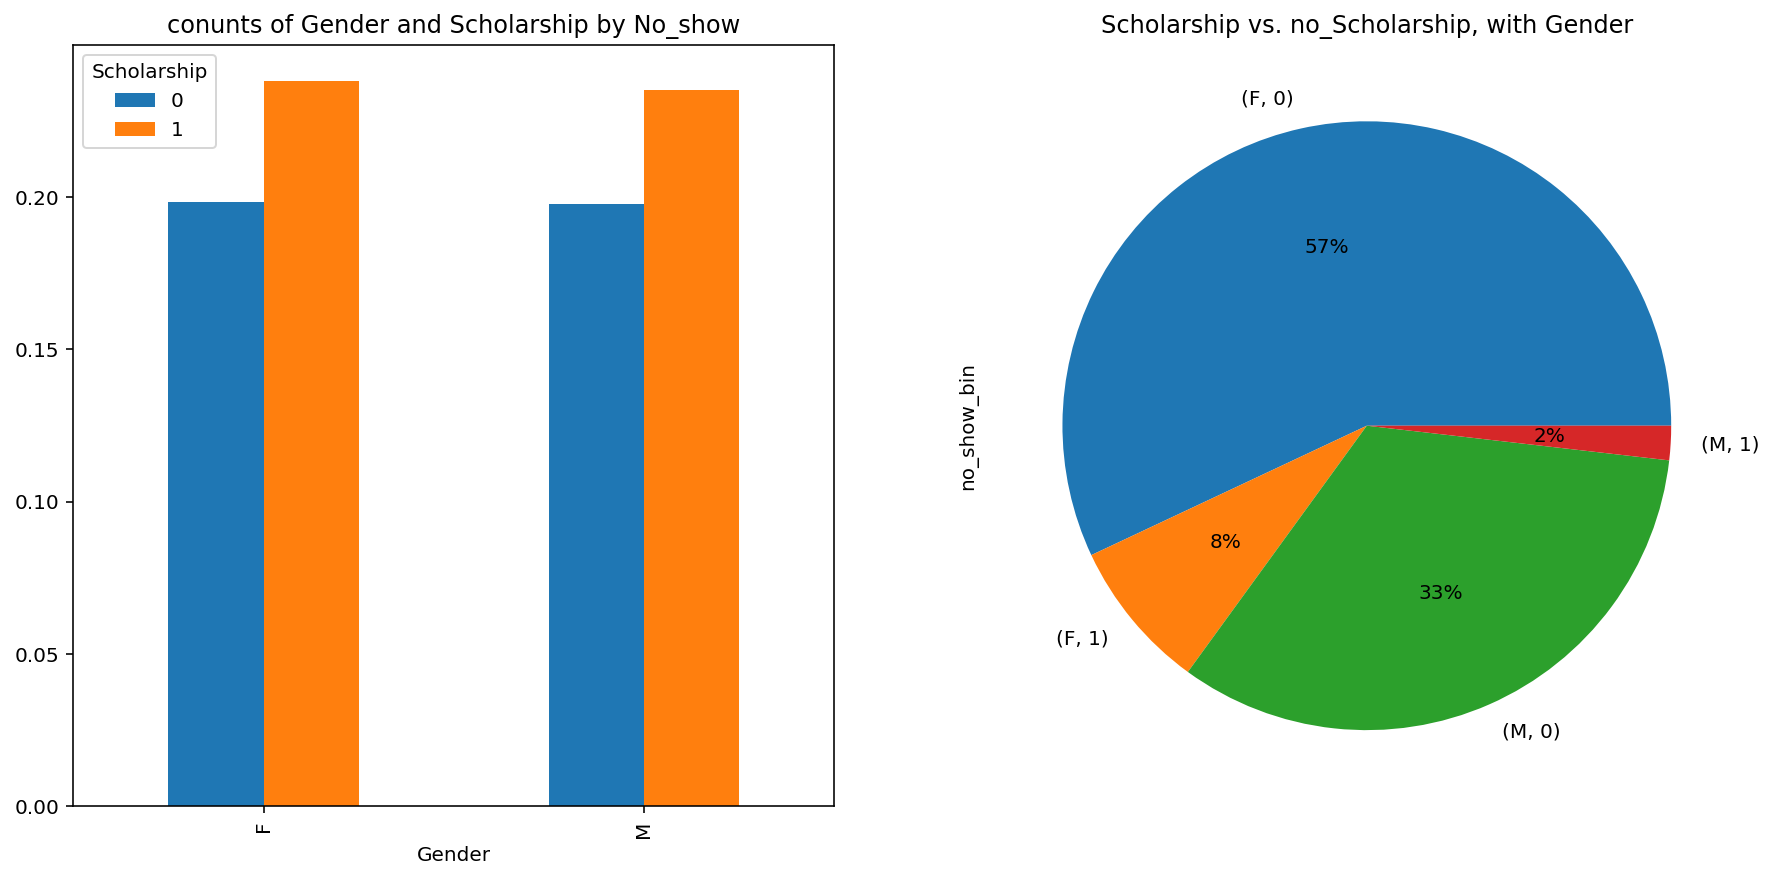

In [38]:
%config InlineBackend.figure_format = 'retina'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7)) 
counts_gender_scholarship = df_cleaning.groupby(['Gender', 'Scholarship'])['no_show_bin'].mean()
counts_gender_scholarship.unstack().plot(kind='bar',title='conunts of Gender and Scholarship by No_show', ax=axes[0])


df_cleaning.groupby(['Gender', 'Scholarship'])['no_show_bin'].count().plot(kind = 'pie', autopct='%1.0f%%')
axes[1].set_title('Scholarship vs. no_Scholarship, with Gender');

>性别和福利保障一起对患者是否会按照其挂号预约前往医院就诊无影响。因为男性和女性中有福利保障和无福利保障中未赴约人数比例相等。由饼图可以确定对赴人数比例的计算有足够的样本。

<a id='conclusions'></a>
## 结论

> 综上所述，年龄、福利保障、Hipertension、Diabetes、Alcoholism 和 Handcap均能帮我们预测患者是否会按照其挂号预约前往医院就诊，而性别、性别和福利保障一起不能帮我们预测患者是否会按照其挂号预约前往医院就诊。数据集有十几万条数据，足够用来分析所要研究的问题，在数据清理时，采用中位数来代替年龄中的异常值，对研究年龄能否帮我们预测患者是否会按照其挂号预约前往医院就诊有一定的影响，其余的无影响。

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset-zh.ipynb'])

0